# Predicting customer churn with SVM, Random Forest, and K Nearest Neighbor

## Objective:
    - Analyse the dataset to identify leading indicators of customer churn.
    - Predict whether a customer will churn with customer characteristics using classification algorithms. 
    
## Increasing model accuracy:
    - Using grid search to identify C and gamma value for Support Vector classification for a perfect balance of bias variance. 
    - Using right K value to maximize model accuracy of KNN model. 


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
sns.set(rc={'figure.figsize':(12,5)});

In [2]:
# Disabling warnings
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Importing scikit library
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Data overview

In [79]:
df= pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [80]:
# dropping customer ID as it doesnt add any value 
df.drop('customerID',axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


In [8]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df['TotalCharges'].isnull().sum()

11

In [9]:
# Let's drop the 11 rows with null values. 
df.dropna(inplace=True)

In [10]:
# Since most of the variables are object type we will use dummy variables 
# I will drop first column in dummy variables to keep variables independant 
df_dummy = pd.get_dummies(df, drop_first=True) 
df_dummy.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


## Exploratory Data Analysis

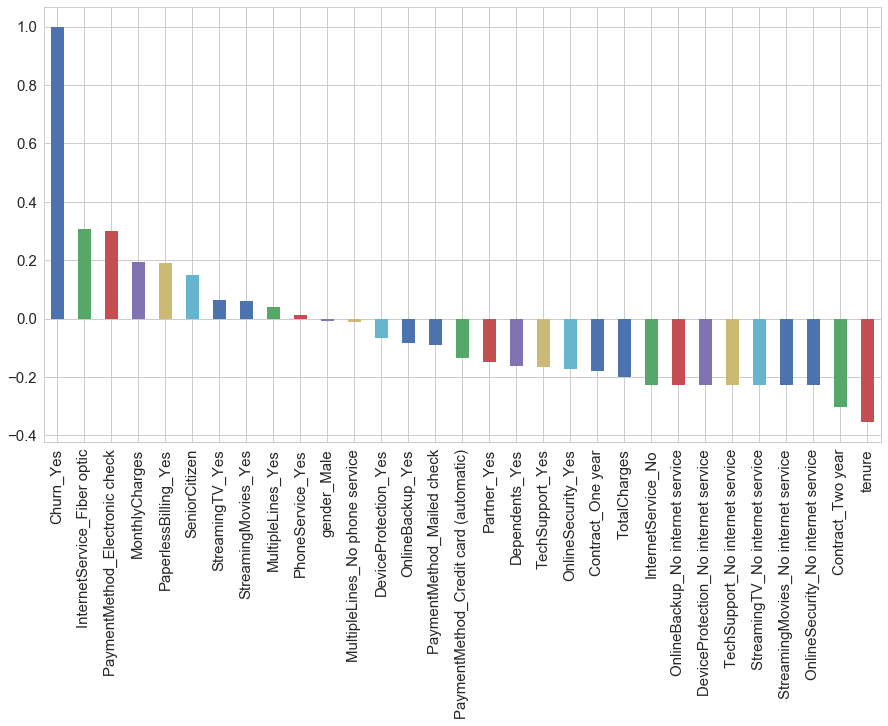

In [57]:
# Correlation of "Churn" with other variables:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
df_dummy.corr()['Churn_Yes'].sort_values(ascending = False).plot(kind='bar')

Churn rate is highly negatively correlated with **tenure and contract**. 

Monthly charges, internet service provider, and payment method used also affect the churn rate. 

Few variables like gender and phone service are not correleted much to the churn rate.

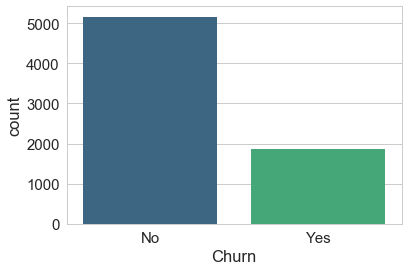

In [80]:
sns.countplot(df['Churn'],palette='viridis')

**26.6%** of the users churn

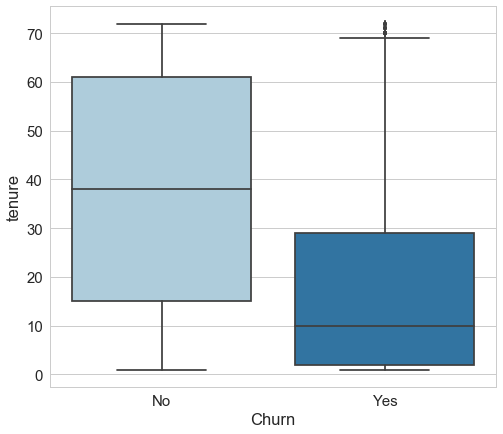

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
# Let's check how tenure affects churn rate. 
sns.boxplot(x = df.Churn, y = df.tenure, palette='Paired')

#### Users with longer tenure are much less likely to churn. Hence, to decrese churn rate it is imperative to retain customers for a longer period of time. 
#### There are only few customer (outliers) who churn with tenure of longer than 70. 


Text(0.5,1,'Number of Customers Churn by Contract Type')

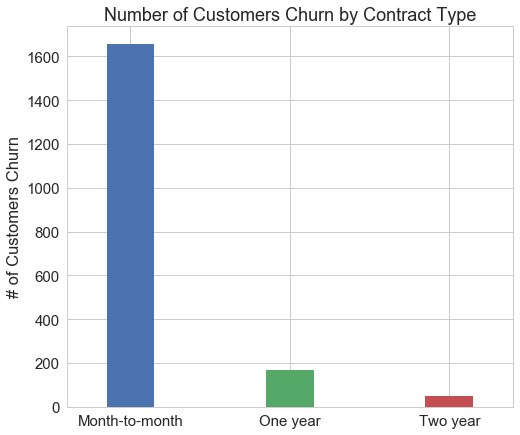

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
ax = df[df['Churn']=='Yes']['Contract'].value_counts().plot(kind = 'bar',rot=0, width = 0.3)
ax.set_ylabel('# of Customers Churn')
ax.set_title('Number of Customers Churn by Contract Type')

#### Most of the the users who churn opt for Month to month contract. 
#### Users with one year and two year contract are much less likely to churn

Text(0.5,1,'Two Year Contract')

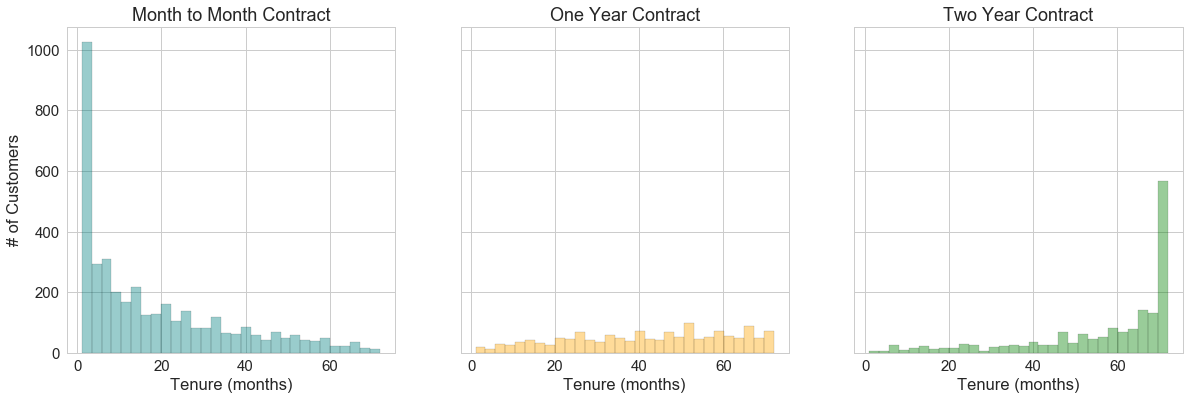

In [85]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   kde=False,
                   bins=30, color = 'teal',
                   hist_kws={'edgecolor':'black'},
                   ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   kde=False,
                   bins=30, color = 'orange',
                   hist_kws={'edgecolor':'black'},
                   ax=ax2)
ax.set_xlabel('Tenure (months)')
ax.set_title('One Year Contract')

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                    kde=False,
                   bins=30, color = 'green',
                   hist_kws={'edgecolor':'black'},
                   ax=ax3)
ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

#### Most monthly contracts last for only 1-2 months, while the 2 year contracts tend to last for about 70 months. 

#### This clearly indicated that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.



Text(0.5,1,'Distribution of Total charges by churn')

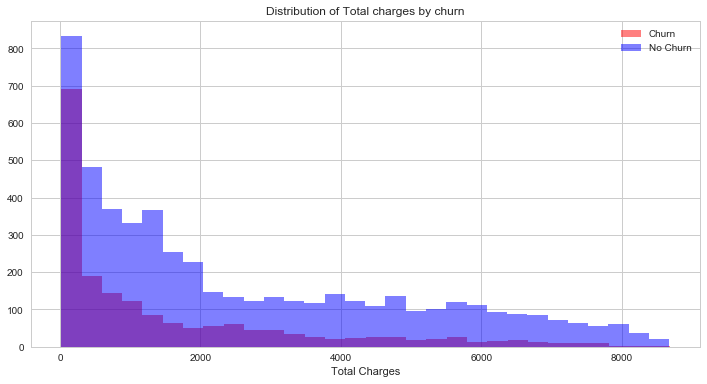

In [72]:
# distribution of Total charges by churn 
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
df[df['Churn']=='Yes']['TotalCharges'].hist(alpha=0.5,color='red',\
                                              bins=30,label='Churn')
df[df['Churn']=='No']['TotalCharges'].hist(alpha=0.5,color='blue',\
                                              bins=30,label='No Churn')
plt.legend()
plt.xlabel("Total Charges")
plt.title("Distribution of Total charges by churn")


**Distribution of total charges appears to be the same.**

In [11]:
# Spitting the data into train and test with 70:30 ratio
X = df_dummy.drop('Churn_Yes',axis=1)
y = df_dummy['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Support Vector Classification

### Grid search to increase SVM accuracy

In [12]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1, 10, 100] , 'gamma': [1,0.1,0.01,0.001]}

In [14]:
# using SVC with grid search 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.6s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total=   0.6s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.6s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.6s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.6s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.6s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.6s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.6s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   45.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [16]:
grid.best_params_
# Looks like C = 1 and gamma = 0.001 gives the right balance of bias variance. 

{'C': 1, 'gamma': 0.001}

In [17]:
# Making predictions 
grid_prediction = grid.predict(X_test)

### Model evaluation

In [25]:
svc_score = accuracy_score(y_test, grid_prediction)
svc_score

0.7829383886255924

In [26]:
print(classification_report(y_test, grid_prediction))

             precision    recall  f1-score   support

          0       0.81      0.92      0.86      1553
          1       0.64      0.40      0.50       557

avg / total       0.77      0.78      0.77      2110



In [27]:
print(confusion_matrix(y_test, grid_prediction))

[[1427  126]
 [ 332  225]]


## Randon Forest Classification

In [35]:
# n_estimators is set to 500 to increase accuracy.
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [41]:
#making prediction
predict_rf = rf.predict(X_test)

### Model evaluation

In [59]:
rf_score = accuracy_score(y_test,predict_rf)
rf_score

0.79478672985782

In [39]:
print(classification_report(y_test,predict_rf))

             precision    recall  f1-score   support

          0       0.84      0.90      0.87      1553
          1       0.64      0.51      0.57       557

avg / total       0.78      0.79      0.79      2110



In [40]:
print(confusion_matrix(y_test,predict_rf))

[[1392  161]
 [ 272  285]]


## KNN Classification

### Choosing the right K value

In [44]:
error = []

for i in range(1,50):
    KNN = KNeighborsClassifier(n_neighbors=i) # training model from 1 to 50 values of K
    KNN.fit(X_train, y_train)
    pred_i = KNN.predict(X_test) # Predicting the values using the K value 
    error.append(np.mean(pred_i != y_test)) # Appending the error to error. 

Text(0,0.5,'Error Rate')

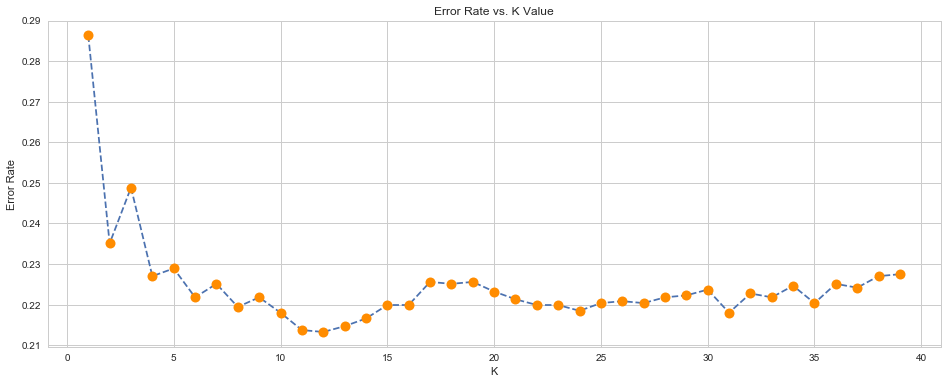

In [51]:
plt.figure(figsize=(16,6))

plt.plot(range(1,40), error, linestyle='dashed', marker='o',
         markerfacecolor='darkorange', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

K value of 12 hsa the least error. Hence, we will use K=12 for our KNN prediction model. 

In [52]:
# fitting the model
knn_model = KNeighborsClassifier(n_neighbors=12)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='uniform')

In [56]:
# Model predictions
knn_prediction = knn_model.predict(X_test)

### Model Evaluation

In [57]:
knn_score = accuracy_score(y_test, knn_prediction)
knn_score

0.7867298578199052

In [60]:
print(classification_report(y_test,knn_prediction))

             precision    recall  f1-score   support

          0       0.81      0.93      0.87      1553
          1       0.67      0.38      0.49       557

avg / total       0.77      0.79      0.77      2110



In [61]:
print(confusion_matrix(y_test,knn_prediction))

[[1448  105]
 [ 345  212]]


## Comparing accuracy

In [70]:

com_acc = pd.DataFrame([svc_score, rf_score,knn_score],\
                       ['Support Vector Machine','Random Forest','K Nearest Neighbor'],columns=['Accuracy'])

In [71]:
com_acc

,Accuracy
Support Vector Machine,0.782938
Random Forest,0.794787
K Nearest Neighbor,0.786730


#### All three models have almost the same accuracy with Random Forest giving a slightly better performance.